In [1]:
import sys
sys.path.insert(0,"..")

from src.utils import read_file_with_custom_data_types

df = read_file_with_custom_data_types("../data/transformed/transform.csv")

df.head()

,id,created_at,updated_at,name,description,gsf_standards_version,estimated_annual_credits,crediting_period_start_date,crediting_period_end_date,methodology,...,Goal_2,Goal_11,Goal_9,Goal_10,Goal_16,Goal_14,crediting_days,VER_sold_percentage,VER_sold_percentage_per_day,continent_code
0,3672,2022-08-22 22:08:54+00:00,2023-04-10 02:53:24+00:00,Top Third Ventures Stove Programme CPA KE0008 ...,The purpose of the CPA is to achieve widesprea...,Gold Standard for the Global Goals,123400,2019-11-03,2024-11-02,AMS-II.G. Energy Efficiency Measures in Therma...,...,0,0,0,0,0,0,1826,0.0,0.0,AF
1,3670,2022-08-17 11:48:09+00:00,2023-04-10 02:41:40+00:00,Top Third Ventures Stove Programme CPA KE0007 ...,The purpose of the CPA is to achieve widesprea...,Gold Standard for the Global Goals,26300,2019-11-03,2024-11-02,AMS-II.G. Energy Efficiency Measures in Therma...,...,0,0,0,0,0,0,1826,0.0,0.0,AF
2,3669,2022-08-17 11:47:34+00:00,2023-04-10 02:39:45+00:00,Top Third Ventures Stove Programme CPA KE0006 ...,The purpose of the CPA is to achieve widesprea...,Gold Standard for the Global Goals,42093,2019-09-18,2024-09-17,AMS-II.G. Energy Efficiency Measures in Therma...,...,0,0,0,0,0,0,1826,0.0,0.0,AF
3,3668,2022-08-17 11:46:50+00:00,2023-04-10 02:36:31+00:00,Top Third Ventures Stove Programme CPA KE0005 ...,The purpose of the CPA is to achieve widesprea...,Gold Standard for the Global Goals,42093,2019-09-18,2024-09-17,AMS-II.G. Energy Efficiency Measures in Therma...,...,0,0,0,0,0,0,1826,0.0,0.0,AF
4,3667,2022-08-17 11:45:44+00:00,2023-04-10 02:30:48+00:00,Top Third Ventures Stove Programme CPA KE0004 ...,The purpose of the CPA is to achieve widesprea...,Gold Standard for the Global Goals,42093,2019-09-18,2024-09-17,AMS-II.G. Energy Efficiency Measures in Therma...,...,0,0,0,0,0,0,1826,0.0,0.0,AF


In [32]:
df.dropna(subset=['methodology'], how='all', inplace=True)


In [34]:
df.count()

id                             1411
created_at                     1411
updated_at                     1411
name                           1411
description                    1411
gsf_standards_version          1411
estimated_annual_credits       1411
crediting_period_start_date    1411
crediting_period_end_date      1411
methodology                    1411
type                           1411
size                           1411
sustaincert_id                 1411
sustaincert_url                1411
project_developer              1411
country                        1411
country_code                   1411
latitude                       1017
longitude                      1017
carbon_stream                  1411
programme_of_activities        1411
poa_project_id                  761
poa_project_sustaincert_id      761
poa_project_name                761
VER_issued_credits             1411
VER_retired_credits            1411
Goal_8                         1411
Goal_13                     

In [30]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

np.random.seed(108)
goal_cols = df.filter(like='Goal_').columns

numerical_columns = ["VER_sold_percentage_per_day"]
categorical_columns = [
    "continent_code",
    "size",
    "type",
]

categorical_columns = np.concatenate((categorical_columns,goal_cols))

num_pipeline= Pipeline(
    steps=[
    # ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
    ]
)

cat_pipeline=Pipeline(
    steps=[
    # ("imputer",SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ("scaler",StandardScaler(with_mean=False))
    ]
)

preprocessor=ColumnTransformer(
    [
    ("num_pipeline",num_pipeline,numerical_columns),
    ("cat_pipelines",cat_pipeline,categorical_columns)
    ],
    #remainder='passthrough',
    verbose_feature_names_out = False
)

preprocessor.set_output(transform="pandas")

X = preprocessor.fit_transform(df)
X.columns


Index(['VER_sold_percentage_per_day', 'continent_code_AF', 'continent_code_AS',
       'continent_code_EU', 'continent_code_OC', 'continent_code_SA',
       'continent_code_nan', 'size_Large Scale', 'size_Micro Scale',
       'size_Small Scale', 'type_A/R', 'type_Biogas - Cogeneration',
       'type_Biogas - Electricity', 'type_Biogas - Heat',
       'type_Biomass, or Liquid Biofuel - Electricity',
       'type_Biomass, or Liquid Biofuel - Heat',
       'type_Energy Efficiency - Domestic',
       'type_Energy Efficiency - Industrial',
       'type_Energy Efficiency - Public Sector',
       'type_Energy Efficiency - Transport Sector', 'type_Geothermal',
       'type_Other', 'type_Small, Low - Impact Hydro',
       'type_Solar Thermal - Electricity', 'type_Solar Thermal - Heat',
       'type_Wind', 'Goal_3_0', 'Goal_3_1', 'Goal_1_0', 'Goal_1_1',
       'Goal_13_1', 'Goal_7_0', 'Goal_7_1', 'Goal_8_0', 'Goal_8_1',
       'Goal_12_0', 'Goal_12_1', 'Goal_5_0', 'Goal_5_1', 'Goal_15_0',
      

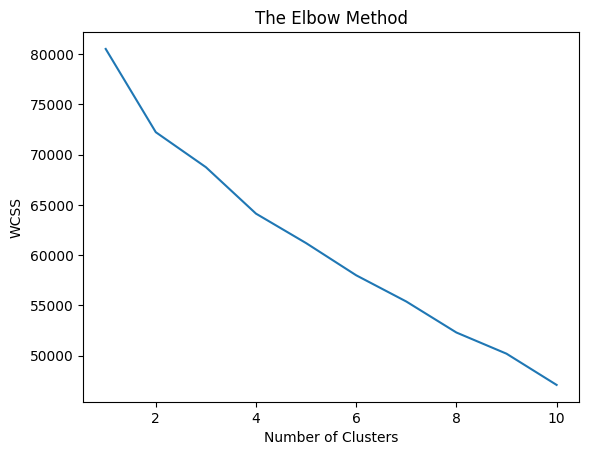

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=1, random_state=108)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=1, random_state=108)
y_kmeans=kmeans.fit_predict(X)

df['K_Means_Cluster'] = y_kmeans

df['K_Means_Cluster'].value_counts()

0    871
1    516
2      1
Name: K_Means_Cluster, dtype: int64

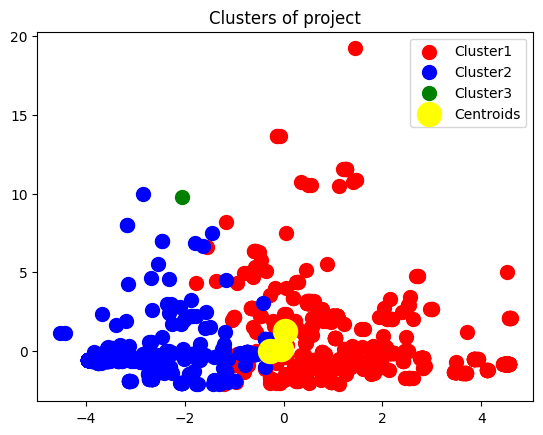

In [33]:
from sklearn.decomposition import PCA


# Reduce the dimensions using PCA
pca = PCA(n_components=2)
X_ = pca.fit_transform(X)

#Visualize the clusters

plt.scatter(X_[y_kmeans==0,0],X_[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X_[y_kmeans==1,0],X_[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X_[y_kmeans==2,0],X_[y_kmeans==2,1],s=100,c='green',label='Cluster3')
# plt.scatter(X_[y_kmeans==3,0],X_[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
# plt.scatter(X_[y_kmeans==4,0],X_[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of project')
plt.legend()
plt.show()


### Using Fuzzy Clustering

In [34]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz

# Set the number of clusters and fuzziness parameter
num_clusters = 3
fuzziness_param = 2

# Initialize the cluster centers and membership matrix
#cluster_centers, membership_matrix
cluster_centers, cluster_membership, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X.T, num_clusters, fuzziness_param, error=0.005, maxiter=1000, init=None)

# Assign each data point to the cluster with the highest membership probability
cluster_labels = np.argmax(cluster_membership, axis=0)

# Print the cluster centers and number of data points in each cluster
for i in range(num_clusters):
    cluster_data = X.iloc[cluster_labels == i]
    print(f'Cluster {i+1} center: {cluster_centers[:, i]}')
    print(f'Number of data points in cluster {i+1}: {len(cluster_data)}')



df['Fuzzy_Cluster'] = cluster_labels

print()
print(df['Fuzzy_Cluster'].value_counts())

Cluster 1 center: [ 0.04221461  0.03417715 -0.06422665]
Number of data points in cluster 1: 444
Cluster 2 center: [1.07900746 1.05366614 0.32474063]
Number of data points in cluster 2: 466
Cluster 3 center: [0.82671108 0.84997477 1.59080762]
Number of data points in cluster 3: 478

2    478
1    466
0    444
Name: Fuzzy_Cluster, dtype: int64


In [35]:
df.to_csv('../data/predictions/clustered.csv',index=False, header=True)